<a href="https://colab.research.google.com/github/Martin09/DeepSEM/blob/master/segmentation-NWs/1_nw_seg_image_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NM Segmentation 1: Image Preparation
In this notebook we will:
1. Import our raw SEM images.
2. Crop and export these images as PNG files.
3. Upload images for labelling to a new [Labelbox](https://labelbox.com/) project.

## 1.1 - Download the dataset

In [1]:
# # Optional: Save everything to your own GoogleDrive
# from google.colab import drive
# drive.mount('/content/gdrive/')
# %cd "/content/gdrive/My Drive/path/to/save/location"

# Clone the DeepSEM repository
!rm -rf DeepSEM  # Remove folder if it already exists
!git clone https://github.com/Martin09/DeepSEM

Cloning into 'DeepSEM'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 438 (delta 41), reused 25 (delta 11), pack-reused 358
Receiving objects: 100% (438/438), 102.71 MiB | 10.68 MiB/s, done.
Resolving deltas: 100% (189/189), done.


In [2]:
dataset_dir = './DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_rawtiffs'
!rm -rf $dataset_dir  # Remove dataset directory if it already exists
!wget https://github.com/Martin09/DeepSEM/raw/master/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_rawtiffs.zip
!unzip WJ_NWs_D1-17-02-17-C_rawtiffs.zip -d $dataset_dir
!rm WJ_NWs_D1-17-02-17-C_rawtiffs.zip

--2020-06-11 09:07:37--  https://github.com/Martin09/DeepSEM/raw/master/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_rawtiffs.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Martin09/DeepSEM/master/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_rawtiffs.zip [following]
--2020-06-11 09:07:38--  https://raw.githubusercontent.com/Martin09/DeepSEM/master/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_rawtiffs.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30409507 (29M) [application/zip]
Saving to: ‘WJ_NWs_D1-17-02-17-C_rawtiffs.zip’

WJ_NWs_D1-17-02-17- 100%[===================>]  29.00M  48.

## 1.2 - Export as PNG
Here we will import the raw TIFF images and export them as PNG files. Since the magnification of these images is relatively high, we only have a a few (<100) objects per image. Thus, we do not need to break the image up into smaller images and we can use the full resolution for training and inference.

In [0]:
import glob, cv2
from google.colab.patches import cv2_imshow
input_files = glob.glob('./DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_rawtiffs/*.tif')

Import a raw TIFF image to see what it looks like.

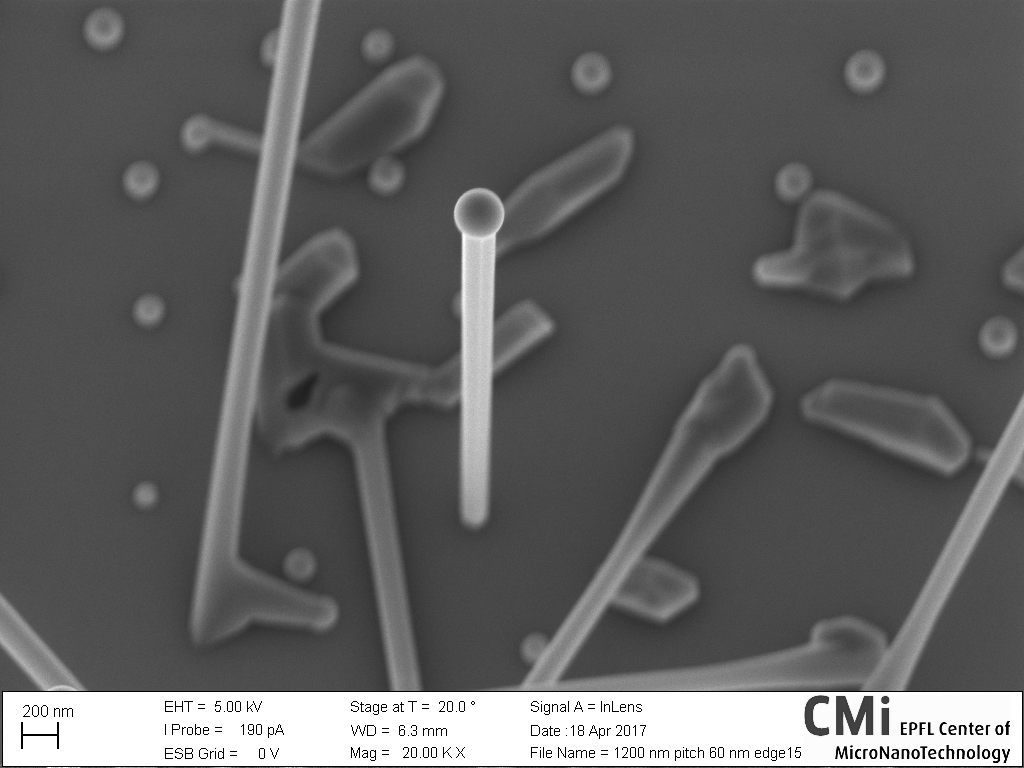

In [4]:
im = cv2.imread(input_files[0], cv2.IMREAD_GRAYSCALE)
cv2_imshow(im)

Loop over all the raw image files and save each as a PNG file.

In [0]:
output_directory = './DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_png/'
!rm -rf $output_directory
!mkdir $output_directory

In [6]:
# Loop over the TIFF files
for file in input_files:
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE) # Import the next image

    # Trim off the overlay bar at bottom of image
    img = img[:688,:]

    # Save as PNG file
    filename = output_directory + file[:-4].split('/')[-1]+'.png'
    print(filename)

    success = cv2.imwrite(filename, (img).astype('uint8')) # Save divided image as PNG

    if not success:
        print("Error, couldn't write image '{}'. Check if output directory exists!".format(filename))

./DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_png/1200 nm pitch 60 nm edge15.png
./DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_png/1400 nm pitch 45 nm edge04.png
./DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_png/1200 nm pitch 60 nm edge17.png
./DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_png/1600 nm pitch 60 nm edge15.png
./DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_png/2000 nm pitch 60 nm edge08.png
./DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_png/1800 nm pitch 60 nm edge26.png
./DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_png/600 nm pitch 45 nm edge02.png
./DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_png/1800 nm pitch 45 nm edge18.png
./DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_png/2000 nm pitch 60 nm edge05.png
./DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_png/800 nm pitch 45 nm center02.png
./DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_png/1400 nm pitch 60 nm

Visualize what an exported PNG image looks like:

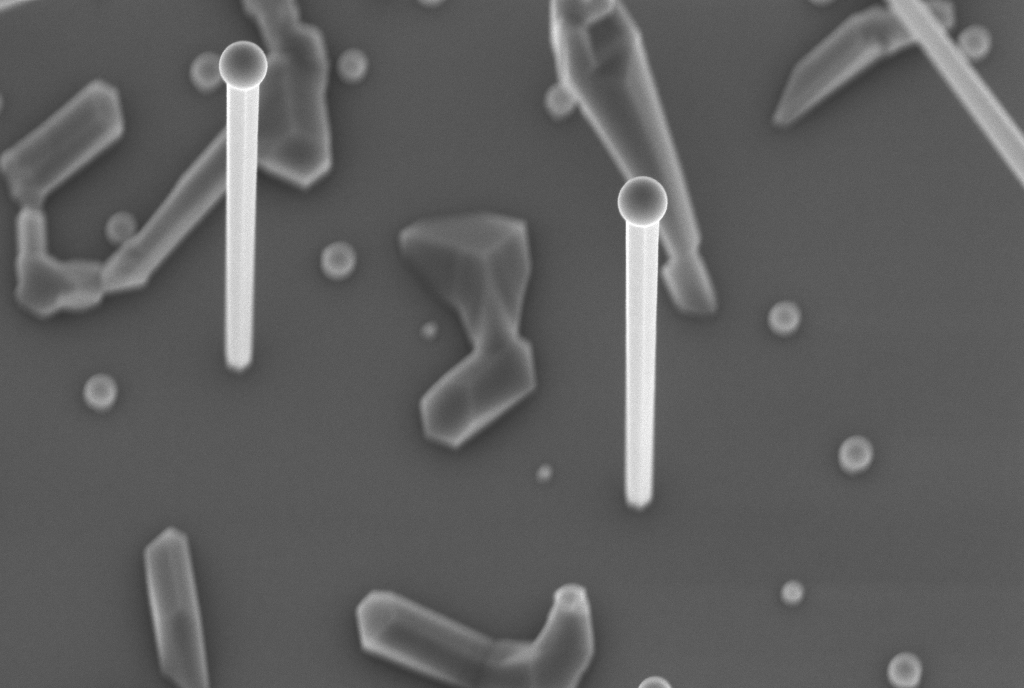

In [7]:
im = cv2.imread('./DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_png/1200 nm pitch 60 nm edge17.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(im)

## 1.3 - Labelling

Now we are ready to label these images for training the neural network. There are many tools available for creating labelled datasets. In this tutorial I will be using [Labelbox](https://labelbox.com/) for this purpose. 

Note: for those that don't care about labelling their own dataset, you can skip ahead to [Notebook 2](https://colab.research.google.com/github/Martin09/DeepSEM/blob/master/nanowire_yield/2_nw_yield_training.ipynb) where I will provide the pre-labelled data for the next steps.

Moving on, let's install the labelbox API first:

In [0]:
!pip install labelbox

     |████████████████████████████████| 40kB 2.6MB/s 


If you haven't already done so, go ahead and make a free Labelbox account. You can either upload your images to be labelled manually, or you can upload them directly using this script below. 

***If you want to upload the images from this script, you need to create an API key [here](https://app.labelbox.com/account/api-keys) and paste it below:***

In [0]:
API_KEY = '[INSERT LABELBOX API KEY HERE]'

Now we can make a new Labelbox project and a new dataset before uploading the sub-divided images.

In [0]:
# Change these names if you wish
project_name = 'NanowireSegmentation'
dataset_name = 'WJ_NWs_D1-17-02-17-C'

# Create a new project and dataset in Labelbox
from labelbox import Client
client = Client(API_KEY)
project = client.create_project(name=project_name)
dataset = client.create_dataset(name=dataset_name, projects=project)

In [0]:
# Perform a bulk upload of the subdivided PNG files
dataset_dir = './DeepSEM/segmentation-NWs/datasets/WJ_NWs_D1-17-02-17-C_png/'
dataset_files = glob.glob(dataset_dir + '*.png')  # Get a list of the files to upload
dataset.create_data_rows(dataset_files) # Upload the files

<Task ID: ckb98ce4vdtue07161a01ueuu>

After a few minutes, you should see the new project and images appear in your Labelbox account, [here](https://app.labelbox.com/projects). You can now finish setting up your Labelbox project on the website, including setting your object classes.

For this tutorial, we will be doing segmentation. Therefore, be sure to ***only*** define segmentation objects (not bounding box or polygon objects, for example).

[Notebook 2](https://colab.research.google.com/github/Martin09/DeepSEM/blob/master/nanostruct_seg/2_ns_seg_inference.ipynb) assumes you have finished your labelling and have exported a labelbox .JSON file with all of your bounding box labels. If you don't have your own labelled dataset don't worry, I will provide that for you. See you there!